In [1]:
import pandas as pd
import os

In [2]:
consumos = pd.read_csv(r"C:\Users\toto9\Desktop\Seminário\dados\consumos_horarios_7digitos_anotodo.csv")

In [9]:
consumos["Código Postal Ajustado"] = consumos["Código Postal"].str.replace("-", "")
consumos.head()

,Unnamed: 0,Código Postal,Dia,Hora,Energia ativa (kWh),Código Postal Ajustado
0,0,3000-003,01-01,0,17.830388,3000003
1,1,3000-003,01-01,1,18.472971,3000003
2,2,3000-003,01-01,2,16.846703,3000003
3,3,3000-003,01-01,3,16.743939,3000003
4,4,3000-003,01-01,4,15.158303,3000003


In [7]:
df_ptd = pd.read_csv(r"C:\Users\toto9\Desktop\Seminário\dados\CP_distribPerc.csv")

In [8]:
df_ptd.head()

,fid,Código Postal 4 Dígitos,Código Postal 3 Dígitos,Código Postal Junto,Latitude,Longitude,geometry,X,Y,fid_2,Name,area_intersect,area_perc,id_codpostal,id_PTD,voronoi_codpostal_area_total
0,1,3060,610,3060610,40.351731,-8.752189,POINT (-8.752189 40.351731),-52593.610045,76073.245645,1231,20%-39%,2407,0.073217,109588,1231,3.287479e+06
1,2,3060,610,3060610,40.351731,-8.752189,POINT (-8.752189 40.351731),-52593.610045,76073.245645,1515,20%-39%,2413295,73.408704,109588,1515,3.287479e+06
2,3,3060,610,3060610,40.351731,-8.752189,POINT (-8.752189 40.351731),-52593.610045,76073.245645,1809,40%-59%,871776,26.518079,109588,1809,3.287479e+06
3,4,3060,672,3060672,40.317880,-8.762777,POINT (-8.762777 40.31788),-53519.851547,72320.703943,931,20%-39%,121238,28.977616,161264,931,4.183848e+05
4,5,3060,672,3060672,40.317880,-8.762777,POINT (-8.762777 40.31788),-53519.851547,72320.703943,1123,+100%,63622,15.206568,161264,1123,4.183848e+05


In [11]:
# Passo 1: Agregação de consumo por Código Postal Ajustado, Dia e Hora
consumos_agg = consumos.groupby(["Código Postal Ajustado", "Dia", "Hora"])["Energia ativa (kWh)"].sum().reset_index()

# Garantir que ambos os códigos postais estão em formato string
consumos["Código Postal Ajustado"] = consumos["Código Postal Ajustado"].astype(str)
df_ptd["Código Postal Junto"] = df_ptd["Código Postal Junto"].astype(str)

# Passo 2: Merge com df_ptd para associar código postal ao PTD
merged = consumos_agg.merge(
    df_ptd,
    left_on="Código Postal Ajustado",
    right_on="Código Postal Junto",
    how="inner"  # ou "left" se quiser manter todos os consumos
)

# Passo 3: Calcular o consumo ponderado
merged["consumo_ponderado"] = merged["Energia ativa (kWh)"] * (merged["area_perc"] / 100)

# Passo 4: Agregação final por PTD, Dia e Hora
consumo_ptd = merged.groupby(["id_PTD", "Dia", "Hora"])["consumo_ponderado"].sum().reset_index()

# (Opcional) Renomear coluna final
consumo_ptd.rename(columns={"consumo_ponderado": "Energia ativa (kWh) Ponderada"}, inplace=True)

In [12]:
consumo_ptd.head()

,id_PTD,Dia,Hora,Energia ativa (kWh) Ponderada
0,2,01-01,0,63.223375
1,2,01-01,1,55.388896
2,2,01-01,2,53.203883
3,2,01-01,3,51.974281
4,2,01-01,4,56.100738


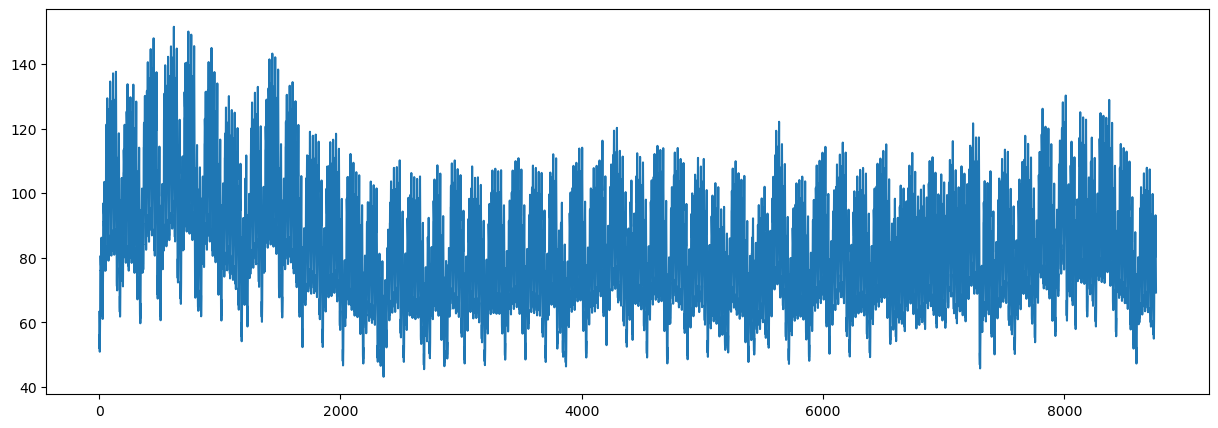

In [18]:
import matplotlib.pyplot as plt

# Separar um código postal aleatório
df_ptd = consumo_ptd[consumo_ptd["id_PTD"] == 2]

# Plotar os dados
plt.figure(figsize=(15, 5))

# Plotar dados reais (setembro e novembro)
plt.plot(df_ptd["Energia ativa (kWh) Ponderada"])
plt.show()

In [20]:
consumo_ptd.to_csv(r"C:\Users\toto9\Desktop\Seminário\dados\consumo_horario_por_ptd.csv")